In [1]:
# permutations of actions and queue

In [2]:
import pandas as pd
import numpy as np
import random
from random import randrange
import time
import os
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import itertools
from itertools import permutations
from itertools import combinations

from copy import deepcopy

# https://www.redblobgames.com/grids/circle-drawing/

In [3]:
class world:
    def __init__(self,size):
        self.size = size
        self.fig = None
        self.grid = None
        self.coin_locations = []
        self.enemy_locations = []

    def Generate_Map(world):
        # generate a grid with the dimensions of world.Size
        grid = np.zeros([world.size,world.size])
    
        fig = plt.figure(figsize = [5,5])
        plt.xlim(0,world.size)
        plt.ylim(0,world.size)

        world.grid = grid
        world.fig = fig

    def Add_Enemy(world,Location):
        # add an enemy to the grid at the specified location
        world.grid[Location[0],Location[1]] = 2
        world.enemy_locations.append(Location)
    

In [4]:
class entity:
    def __init__(self,world):
        self.world = world
        self.IsSpawned = False

        if self.IsSpawned == False:
            self.Location = [0,0]
            
        elif self.IsSpawned == True:
            x_loc = world.Grid[np.where(world.Grid[:,0] == max(world.Grid))]
            print('x: ',x_loc)
            y_loc = world.Grid[np.where(world.Grid[0,:] == max(world.Grid))]
            print('y: ',y_loc)
            self.Location = [x_loc,y_loc]

        self.Speed = 6
        self.Coins = 0


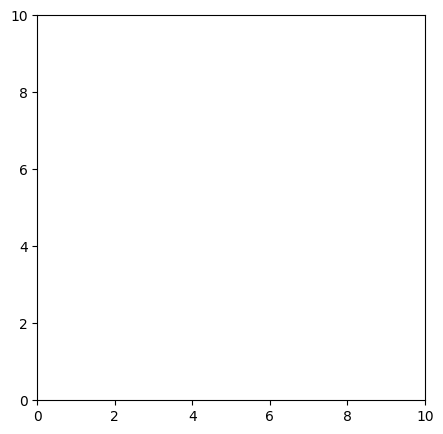

In [5]:
stage = world(10)
stage.Generate_Map()
actor = entity(stage)
stage.Add_Enemy([5,5])

In [6]:
queue = {
    'action': [],
    'destination': [],
    'metadata': []
}


In [7]:
# create observer class
class Observer:
    def __init__(self, name):
        self.name = name

    def update(self, queue):
        print(f'{self.name} received: {queue}')


class Observable:
    def __init__(self):
        self.observers = []

    def add_observer(self, observer):
        self.observers.append(observer)

    def remove_observer(self, observer):
        self.observers.remove(observer)

    def notify_observers(self, queue):
        for observer in self.observers:
            observer.update(queue)

    def update_queue(self, queue):
        self.notify_observers(queue)
    

In [8]:
# What Should Be Happening?


# this example permutation is an action-series representing two move actions
# these permutations can range from 1 to 8 numbers in length, and contain numbers 0 through 6. 
# I'm only trying to flesh out the permutations that contain 0s, and the 0s represent move actions
# Example Permutation: [0,0]

# Step 1
# Create 8 new ones
# [ [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0] ]

# Step 2
# Replace the first 0 in each with an adjacent location
# [ [[0,[-1,-1]],0], [[0,[-1,1]],0], [[0,[1,-1]],0], [[0,[1,0]],0], [[0,[0,1]],0], [[0,[-1,0]],0], [[0,[0,-1]],0], [[0,[1,1]],0] ]

# Step 3
# Create 8 copies of each of the above
# [ [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0], [[0,[-1,-1]],0]]
# [ [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0],  [[0,[-1,1]],0]]
# [ [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0],  [[0,[1,-1]],0]]
# [ [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0],   [[0,[1,0]],0]]
# [ [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0],   [[0,[0,1]],0]]
# [ [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0],  [[0,[-1,0]],0]]
# [ [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0],  [[0,[0,-1]],0]]
# [ [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0],   [[0,[1,1]],0]]

# Step 4
# Replace the second 0 in each with an adjacent location to the first 0
# [ [ [0,[-1,-1]],[0,[-2,-2]] ], [ [0,[-1,-1]],[0,[-1,-2]] ], [ [0,[-1,-1]],[0,[0,-2]] ], [ [0,[-1,-1]],[0,[0,-1]] ], [ [0,[-1,-1]],[0,[0,0]] ], [ [0,[-1,-1]],[0,[-1,0]] ], [ [0,[-1,-1]],[0,[-2,0]] ], [ [0,[-1,-1]],[0,[-2,-1]] ] ]
# [ [ [0,[-1,1]],[0,[-2,-1]] ],  [ [0,[-1,1]],[0,[-1,-1]] ],  [ [0,[-1,1]],[0,[0,-1]] ],  [ [0,[-1,1]],[0,[0,0]] ],   [ [0,[-1,1]],[0,[0,1]] ],  [ [0,[-1,1]],[0,[-1,1]] ],  [ [0,[-1,1]],[0,[-2,1]] ],  [ [0,[-1,1]],[0,[-2,0]] ] ]
# [ [ [0,[1,-1]],[0,[0,-2]] ],   [ [0,[1,-1]],[0,[1,-2]] ],   [ [0,[1,-1]],[0,[1,0]] ],   [ [0,[1,-1]],[0,[0,0]] ],   [ [0,[1,-1]],[0,[2,0]] ],  [ [0,[1,-1]],[0,[2,-1]] ],  [ [0,[1,-1]],[0,[2,-2]] ],  [ [0,[1,-1]],[0,[0,-2]] ] ]
# [ [ [0,[1,0]],[0,[2,-1]] ],    [ [0,[1,0]],[0,[1,-1]] ],    [ [0,[1,0]],[0,[0,-1]] ],   [ [0,[1,0]],[0,[0,0]] ],    [ [0,[1,0]],[0,[0,1]] ],   [ [0,[1,0]],[0,[1,1]] ],    [ [0,[1,0]],[0,[2,1]] ],    [ [0,[1,0]],[0,[2,0]] ] ]
# [ [ [0,[0,1]],[0,[-1,0]] ],    [ [0,[0,1]],[0,[0,0]] ],     [ [0,[0,1]],[0,[1,0]] ],    [ [0,[0,1]],[0,[1,1]] ],    [ [0,[0,1]],[0,[1,2]] ],   [ [0,[0,1]],[0,[0,2]] ],    [ [0,[0,1]],[0,[-1,2]] ],   [ [0,[0,1]],[0,[-1,1]] ] ]
# [ [ [0,[-1,0]],[0,[-2,1]] ],   [ [0,[-1,0]],[0,[-1,1]] ],   [ [0,[-1,0]],[0,[0,1]] ],   [ [0,[-1,0]],[0,[0,0]] ],   [ [0,[-1,0]],[0,[0,-1]] ], [ [0,[-1,0]],[0,[-1,-1]] ], [ [0,[-1,0]],[0,[-2,-1]] ], [ [0,[-1,0]],[0,[-2,0]] ] ]
# [ [ [0,[0,-1]],[0,[1,-2]] ],   [ [0,[0,-1]],[0,[0,-2]] ],   [ [0,[0,-1]],[0,[-1,-2]] ], [ [0,[0,-1]],[0,[-1,-1]] ], [ [0,[0,-1]],[0,[-1,0]] ], [ [0,[0,-1]],[0,[0,0]] ],   [ [0,[0,-1]],[0,[1,0]] ],   [ [0,[0,-1]],[0,[1,-1]] ] ]
# [ [ [0,[1,1]],[0,[0,0]] ],     [ [0,[1,1]],[0,[1,0]] ],     [ [0,[1,1]],[0,[2,0]] ],    [ [0,[1,1]],[0,[2,1]] ],    [ [0,[1,1]],[0,[2,2]] ],   [ [0,[1,1]],[0,[1,2]] ],    [ [0,[1,1]],[0,[0,2]] ],    [ [0,[1,1]],[0,[0,1]] ] ]

# Step 5
# put the indidual action-series into a single list


# what is the ideal output?
# the ideal output would come out as a single list such as the following:
# [
#     [ [0,[-1,-1]],[0,[-2,-2]] ], 
#     [ [0,[-1,-1]],[0,[-1,-2]] ], 
#     [ [0,[-1,-1]],[0,[0,-2]] ], 
#     [ [0,[-1,-1]],[0,[0,-1]] ], 
#     [ [0,[-1,-1]],[0,[0,0]] ], 
#     [ [0,[-1,-1]],[0,[-1,0]] ], 
#     [ [0,[-1,-1]],[0,[-2,0]] ], 
#     [ [0,[-1,-1]],[0,[-2,-1]] ]
#
#
# ]

In [9]:
# action_series
# location_series

# each action_series and location_series will need an identifier
# the identifier is for the purpose of identifying which location_series are associated with which action_series in a many (location_series) to one (action_series) relationship

# so what the new process should look like is:
# step 1: create the initial 650 permutations of all the actions
# there will need to be 2 collection lists, we'll call those all_action_series and all_location_series


# step 2: for each action_series, if it contains a 0 or 2 (move or attack), create 8 associated location_series lists
# setting the first number in both as the action_series number, which is the identifier


# step 3: 

In [10]:
def adjacent_locations(pos):
    adjacent_locations_list = []
    # for an 8 directional grid
    for i in range(-1,2):
        for j in range(-1,2):
            adjacent_locations_list.append([pos[0]+i,pos[1]+j])
    adjacent_locations_list.remove(pos)
    return adjacent_locations_list



In [11]:
from itertools import chain, combinations

# Chebyshev 
def chebyshev_distance(pos1,pos2):
    return max(abs(pos1[0]-pos2[0]),abs(pos1[1]-pos2[1]))

# create a power set of all coordinates 6 spaces away from (0,0) according to the Chebyshev distance
locations = []
for x in range(-6,7):
    for y in range(-6,7):
        if chebyshev_distance((0,0),[x,y]) <= 6:
            locations.append((x,y))
print(locations)
print(len(locations))


# I should order the locations by the Chebyshev distance from the origin
locations = sorted(locations,key=lambda x: chebyshev_distance((0,0),x))



def is_legal(sequence, origin=(0,0)):
    # is the first entity the origin, if not false
    if sequence == []:
        return False
    elif sequence[0] != origin:
        return False

    # is the length 8 or less
    if len(sequence) > 8:
        return False
    
    # is the distance between each entity 1 or less
    for i in range(len(sequence)-1):
        if chebyshev_distance(sequence[i],sequence[i+1]) > 1:
            return False
    
    return True


def classical_recursive_one(elems):
    yield [] # first return the result we’re sure about 
    for i in range(len(elems)):
        for x in classical_recursive_one(elems[i+1:]): 
            # induction part
            yield [elems[i]] + x
             
def classical_iterative(elems):
    powerset_size = 2**len(elems)
    print('Powerset Size: ',powerset_size)
    counter = 0
    j = 0
 
    for counter in range(0, powerset_size):
        print(counter)
        results = []
        for j in range(0, len(elems)):
            # take the element if on bit position j it says to take it (i.e. 1 appears)
            if((counter & (1 << j)) > 0):
                results.append(elems[j])
        if is_legal(results):
            yield results
        else:
            continue

def powerset(iterable):
    "powerset([1,2,3]) → () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    results = chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
    
    good_results = []
    for result in results:
        if is_legal(list(result)):
            good_results.append(result)
            yield result
        else:
            continue

    print('Good Results: ',len(good_results))
    return good_results

#powerset_results = powerset(locations)
#powerset_results

#for x in classical_recursive_one(locations):
#for x in classical_iterative(locations):

#for x in powerset_results:
#    print(x)

#moves = classical_iterative(locations)


[(-6, -6), (-6, -5), (-6, -4), (-6, -3), (-6, -2), (-6, -1), (-6, 0), (-6, 1), (-6, 2), (-6, 3), (-6, 4), (-6, 5), (-6, 6), (-5, -6), (-5, -5), (-5, -4), (-5, -3), (-5, -2), (-5, -1), (-5, 0), (-5, 1), (-5, 2), (-5, 3), (-5, 4), (-5, 5), (-5, 6), (-4, -6), (-4, -5), (-4, -4), (-4, -3), (-4, -2), (-4, -1), (-4, 0), (-4, 1), (-4, 2), (-4, 3), (-4, 4), (-4, 5), (-4, 6), (-3, -6), (-3, -5), (-3, -4), (-3, -3), (-3, -2), (-3, -1), (-3, 0), (-3, 1), (-3, 2), (-3, 3), (-3, 4), (-3, 5), (-3, 6), (-2, -6), (-2, -5), (-2, -4), (-2, -3), (-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3), (-2, 4), (-2, 5), (-2, 6), (-1, -6), (-1, -5), (-1, -4), (-1, -3), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3), (-1, 4), (-1, 5), (-1, 6), (0, -6), (0, -5), (0, -4), (0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, -6), (1, -5), (1, -4), (1, -3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, -6), (2, -5), (2, -4), (2, -3), (2, -

In [12]:
# lets create the power set for action_series
from itertools import chain, combinations

subaction_dict = {
    '0': 'Move_One',                # needs a target
    '1': 'Move_Two',
    '2': 'Move_Three',
    '3': 'Move_Four',
    '4': 'Object (Bonus)',      # needs a target
    '5': 'Attack',              # needs a target
    '6': 'Dodge',
    '7': 'Object',              # needs a target
}


def generate_turns():
    all_action_series = []

    for length in range(1, 9):  # Turns can be 1 to 8 actions long: 6 Moves, 1 Object Interaction, 1 Action
        for turn in itertools.product(range(8), repeat=length):
            if validate_turn(turn):
                yield turn
    
    return list(all_action_series)


def validate_turn(turn):
    # options 0, 1, and 2 are now Move Variants
    # a player can only move 6 times in a turn
    # 0 uses 1 move, 1 uses 2 moves, 2 uses 3 moves
    # options 3 and 8 are now Object Interactions
    
    move_count = 0
    individual_move_count = 0
    object_interact_count = 0
    action_count = 0



    for action in turn:
        if action == 0:
            move_count += 1
            individual_move_count += 1

        if action == 1:
            move_count += 2
        
        if action == 2:
            move_count += 3
        
        if action == 3:
            move_count += 4

        if action in [4, 7]:
            object_interact_count += 1
        
        if action in [5, 6, 7]:
            action_count += 1
        
    return (move_count <= 6 and 
            individual_move_count <= 3 and
            object_interact_count <= (2 if 7 in turn else 1) and 
            action_count <= 1)

def remove_redundant_turns():
    turns = generate_turns()
    solid_turns = list(turns)
    #print(turns)
    # what types of moves are redundant?
    # any combo that contains either 3 or 6 but not both and is otherwise the same is redundant
    # first, lets create a list of all the unique permutations
    #turns = turns
    # then, lets create a list of all the permutations that contain either 3 or 6
    #object_interact_turns = [turn for turn in turns if 3 in turn and 6 not in turn or 6 in turn and 3 not in turn]
    # any permutations that are the same other than 3 and 6 should be isolated
    #object_interact_turns = [turn for turn in object_interact_turns if turn not in [x for x in turns if x not in object_interact_turns]]
    
    # then I only need to keep one of the two
    #for turn in object_interact_turns:
    #    if 3 in turn:
    #        turns.remove([x for x in turns if 6 in x and x != turn][0])
    #    elif 6 in turn:
    #        turns.remove([x for x in turns if 3 in x and x != turn][0])

    # any turns that contain three adjacent 0s, two adjacent 0s, or a 0 and a 1 are redundant
    turns_to_remove = []

    for turn in solid_turns:
        adjacent_0_count = 0
        adjacent_1_count = 0
        adjacent_0_1_count = 0
        adjacent_0_2_count = 0
        adjacent_1_2_count = 0

        for i in range(len(turn)-1):
            
            if turn[i] == 0 and turn[i+1] == 0:
                adjacent_0_count += 1
            
            if turn[i] == 1 and turn[i+1] == 1:
                adjacent_1_count += 1
            
            if turn[i] == 0 and turn[i+1] == 1 or turn[i] == 1 and turn[i+1] == 0:
                adjacent_0_1_count += 1
            
            if turn[i] == 0 and turn[i+1] == 2 or turn[i] == 2 and turn[i+1] == 0:
                adjacent_0_2_count += 1

            if turn[i] == 1 and turn[i+1] == 2 or turn[i] == 2 and turn[i+1] == 1:
                adjacent_1_2_count += 1

        if adjacent_0_count > 0:
            turns_to_remove.append(turn)
        if adjacent_1_count > 0:
            turns_to_remove.append(turn)
        if adjacent_0_1_count > 0:
            turns_to_remove.append(turn)
        if adjacent_0_2_count > 0:
            turns_to_remove.append(turn)
        if adjacent_1_2_count > 0:
            turns_to_remove.append(turn)

    # remove duplicates in turns_to_remove
    turns_to_remove = list(set(turns_to_remove))

    for turn in turns_to_remove:
        solid_turns.remove(turn)

    return solid_turns



def choose_turn():
    non_reduntant_turns = remove_redundant_turns()
    all_action_series = {i:turn for i,turn in enumerate(non_reduntant_turns) if validate_turn(turn)}
    print(len(all_action_series))
    #print(all_action_series)
    return all_action_series

In [13]:
def apply_permutations_to_location_series(action_series_dict, location_series_dict, one_space_permutations, two_space_permutations, three_space_permutations, four_space_permutations):
    # use keys to iterate through the action_series_dict
    for key in action_series_dict.keys():
        #print(key)

        # if action_series contains 0 and not 1, 2, or 3, then use move_one_locations
        if 0 in action_series_dict[key] and 1 not in action_series_dict[key] and 2 not in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = one_space_permutations

        # if action_series contains 1 and not 2 or 3, then use move_two_locations
        elif 1 in action_series_dict[key] and 2 not in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = two_space_permutations
        
        # if action_series contains 2 and not 3, then use move_three_locations
        elif 2 in action_series_dict[key] and 3 not in action_series_dict[key]:
            permutation_set = three_space_permutations

        # else use move_four_locations
        else:
            permutation_set = four_space_permutations
        
        # now that the permutation_set is determined, we can go identify the permutations that are appropriate for the action_series
        for location_series in permutation_set:
            # now to check how well the locations fit the action_series
            # if the length of the location_series is longer than the length of the action_series, continue
            number_of_locations_needed = sum({action_series_dict[key].count(i) for i in range(4)})
            #print('Number of Locations Needed: ',number_of_locations_needed)

            if len(location_series) != number_of_locations_needed:
                continue

            


            # if the first item in the location_series is not 1 space away from the origin, then it is not a valid location_series
            # instead of just the first item, it has to be the first item in [0,1,2,3] in the action_series
            for i in range(len(action_series_dict[key])):
                # for the first item in [0,1,2,3] in the action_series
                if action_series_dict[key][i] in [0,1,2,3]:
                    if action_series_dict[key][i] == 0:
                        if len(location_series) > 0 and chebyshev_distance(location_series[0],[0,0]) > 1:
                            continue
                            
                    # for the second item in [0,1,2,3] in the action_series
                    if action_series_dict[key][i] == 1:
                        if len(location_series) > 0 and chebyshev_distance(location_series[0],[0,0]) > 2:
                            continue

                    # for the third item in [0,1,2,3] in the action_series
                    if action_series_dict[key][i] == 2:
                        if len(location_series) > 0 and chebyshev_distance(location_series[0],[0,0]) > 3:
                            continue
                    
                    # for the fourth item in [0,1,2,3] in the action_series
                    if action_series_dict[key][i] == 3:
                        #print(action_series_dict[key])
                        #print(key)
                        #print(i)
                        #print(location_series)
                        if len(location_series) > 0 and chebyshev_distance(location_series[0],[0,0]) > 4:
                            continue
                else:
                    pass


            #if len(location_series) > 0 and action_series_dict[key][0] == 0 and chebyshev_distance(location_series[0],(0,0)) != 1:
            #    continue


            # if in action_series is a 0,1,2 or 3 and any of those numbers are followed by a 5, the two items in location_series with the same index must be adjacent
            for i in range(len(action_series_dict[key])-1):
                if action_series_dict[key][i] in [0,1,2,3] and action_series_dict[key][i+1] == 5:

                    try:
                        if chebyshev_distance(location_series[i],location_series[i+1]) != 1:
                            continue
                    except:
                        continue
                else:
                    location_series_dict[key].append(location_series)
        # no duplicates should exist per action_series_dict[key]
        location_series_dict[key] = list(set(location_series_dict[key]))

    return location_series_dict

    # print the number of location_series_dict items that are not empty
    #print(len([x for x in location_series_dict.values() if x != []]))


In [14]:
def calc_reward_for_action_series_location_series_combo(entity, eval_action_series, eval_location_series):
    reward = 0
    enemy_locations = entity.world.enemy_locations
    coin_locations = entity.world.coin_locations


    # how should actions be evaluated?
    # - if an attack action (3) is taken and there isn't a target within range it should be punished
    
    #if 5 in eval_action_series and 
    print(eval_action_series)
    print(list(eval_action_series))
    
    eval_action_series_only_targeting = [x for x in eval_action_series if x not in [4,6,7]]
    print(eval_action_series_only_targeting)

    for action_index in range(len(eval_action_series_only_targeting)):
        if eval_location_series[action_index] not in enemy_locations:
            reward -= 1
    
    # - if the attack action targets a creature, rewarded 
    #if 5 in eval_action_series and eval_location_series[eval_action_series.index(5)] not in enemy_locations:
    #    reward += 1


    # - if the same locations are being passed over, it should be punished slightly
    #if len(set(eval_location_series)) < len(eval_location_series):
    #    reward -= 1
     
    # - if the movement prompts an opportunity attack, punished
    # - if the movement gets within melee range, punished
    # - if the movement is unoptimal, slightly punished
    # - if the action series is longer than needed, slightly punished
    # - if the object interaction feature picks up an item, rewarded
    #if 4 in eval_action_series and eval_location_series[eval_action_series.index(4)] not in coin_locations:
    #    reward -= 1
    
    #if 7 in eval_action_series and eval_location_series[eval_action_series.index(7)] not in coin_locations:
    #    reward -=1

    # - if the entity is within a straight uninterrupted line of an enemy, slightly punished
    # - if the 


    return reward
    

In [15]:
def calc_rewards_for_location_series(entity, reward_series_dict, location_series_dict, action_series_dict):
    
    for key in action_series_dict.keys():
        for location_series in location_series_dict[key]:
            #print(f'Location series {location_series} at item {key}: {action_series_dict[key]}')
            
            # calc reward score for each action_series + location_series combo
            eval_action_series = action_series_dict[key]
            eval_location_series = location_series
            
            reward_value = calc_reward_for_action_series_location_series_combo(entity, eval_action_series, eval_location_series)

            # append the reward to the dict 
            reward_series_dict[key].append(reward_value)
    
    return reward_series_dict



In [16]:
def generate_location_series(entity):
    # I could do a move_one_locations, move_two_locations, move_three_locations, etc.
    # each would be a list of spaces within the Chebyshev distance of 1, 2, 3, etc.

    locations_within_range = []
    for x in range(-6,7):
        for y in range(-6,7):
            if chebyshev_distance(entity.Location,(x,y)) <= 6:
                locations_within_range.append((x,y))

    move_one_locations = []
    move_two_locations = []
    move_three_locations = []
    move_four_locations = []
    move_five_locations = []
    move_six_locations = []

    for location in locations_within_range:
        if chebyshev_distance(entity.Location,location) == 1:
            move_one_locations.append(location)
        if chebyshev_distance(entity.Location,location) == 2:
            move_two_locations.append(location)
        if chebyshev_distance(entity.Location,location) == 3:
            move_three_locations.append(location)
        if chebyshev_distance(entity.Location,location) == 4:
            move_four_locations.append(location)
        if chebyshev_distance(entity.Location,location) == 5:
            move_five_locations.append(location)
        if chebyshev_distance(entity.Location,location) == 6:
            move_six_locations.append(location)

    print('Move One Locations: ',move_one_locations)
    print('Move Two Locations: ',move_two_locations)
    print('Move Three Locations: ',move_three_locations)
    print('Move Four Locations: ',move_four_locations)
    print('Move Five Locations: ',move_five_locations)
    print('Move Six Locations: ',move_six_locations)
    print('')

    ##### Now for Creating the Location Series #####
    # the most location targets I'll need in a single turn is now 4: moves 1-4 and attack
    # so I only need to create variations that are up to 4 long

    # what if instead of creating all the permutations, I did several based on distance

    # permutations within 1 space
    #one_space_permutations = list(itertools.permutations(move_one_locations,4))
    one_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations, r) for r in range(0, 4)))
    print('One Space Locations: ',len(move_one_locations))
    print('One Space Permutations: ',len(one_space_permutations))
    #print(one_space_permutations)

    # permutations within 2 spaces
    #two_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations,4))
    two_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations + move_two_locations, r) for r in range(0, 4)))
    print('Two Space Locations: ',len(move_one_locations + move_two_locations))
    print('Two Space Permutations: ',len(two_space_permutations))
    #print(two_space_permutations)

    # permutations within 3 spaces
    # the distance between the two locations 
    #three_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations + move_three_locations,4))
    three_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations + move_two_locations + move_three_locations, r) for r in range(0, 4)))
    print('Three Space Locations: ',len(move_one_locations + move_two_locations + move_three_locations))
    print('Three Space Permutations: ',len(three_space_permutations))

    # permutations within 4 spaces
    #four_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations + move_three_locations + move_four_locations,4))
    four_space_permutations = list(itertools.chain.from_iterable(combinations(move_one_locations + move_two_locations + move_three_locations + move_four_locations, r) for r in range(0, 4)))
    print('Four Space Locations: ',len(move_one_locations + move_two_locations + move_three_locations + move_four_locations))
    print('Four Space Permutations: ',len(four_space_permutations))


    # permutations within 5 spaces
    #five_space_permutations = list(itertools.permutations(move_one_locations + move_two_locations + move_three_locations + move_four_locations + move_five_locations,4))
    #print('Five Space Permutations: ',len(five_space_permutations))

    # permutations within 6 spaces

    # either the three_space_permutations should be two locations that are three spaces apart in order torepresent a move action type 2
    # However the issue with that approach is then I'll have to somehow include that pair whenever there's a 2 causing more iterations to be created 
    # the alternative is that the three_space_permutations are permutations where 3 space jumps are allowed
    # however 3 space jumps are only allowed up to 2 times in a turn

    # for the two_space_permutations, if the first location is more than 2 spaces away from entity.location, remove it
    #two_space_permutations = [x for x in two_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 2]
    #three_space_permutations = [x for x in three_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 3]
    #four_space_permutations = [x for x in four_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 4]
    #five_space_permutations = [x for x in five_space_permutations if chebyshev_distance(entity.Location,x[0]) <= 4]

    # I only have ways of reducing the number of location series permutations after they are created
    # - remove those with a distance between any two locations greater than 4
    # need to include if the one_space_permutation doesn't include x[1] or x[2] because it's shorter than 4
    one_space_permutations = [x for x in one_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 1) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 1) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 1)]

    #two_space_permutations = [x for x in two_space_permutations if chebyshev_distance(x[0],x[1]) <= 2 and chebyshev_distance(x[1],x[2]) <= 2 and chebyshev_distance(x[2],x[3]) <= 2]
    two_space_permutations = [x for x in two_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 2) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 2) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 2)]

    #three_space_permutations = [x for x in three_space_permutations if chebyshev_distance(x[0],x[1]) <= 3 and chebyshev_distance(x[1],x[2]) <= 3 and chebyshev_distance(x[2],x[3]) <= 3]
    three_space_permutations = [x for x in three_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 3) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 3) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 3)]

    #four_space_permutations = [x for x in four_space_permutations if chebyshev_distance(x[0],x[1]) <= 4 and chebyshev_distance(x[1],x[2]) <= 4 and chebyshev_distance(x[2],x[3]) <= 4]
    four_space_permutations = [x for x in four_space_permutations if (len(x) < 2 or chebyshev_distance(x[0], x[1]) <= 4) and (len(x) < 3 or chebyshev_distance(x[1], x[2]) <= 4) and (len(x) < 4 or chebyshev_distance(x[2], x[3]) <= 4)]

    # - remove permutations that have more than:
    #  3 two-space jumps
    #  2 three-space jumps
    #  1 four-space jump  
    two_space_permutations = [x for x in two_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 2]) <= 3]

    three_space_permutations = [x for x in three_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 3]) <= 2]
    three_space_permutations = [x for x in three_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 2]) <= 3]

    four_space_permutations = [x for x in four_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 4]) <= 1]
    four_space_permutations = [x for x in four_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 3]) <= 2]
    four_space_permutations = [x for x in four_space_permutations if sum([1 for i in range(len(x)-1) if chebyshev_distance(x[i],x[i+1]) == 2]) <= 3]

    # - remove those with the same location repeated
    #one_space_permutations = [x for x in one_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]

    one_space_permutations = [x for x in one_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]
    
    #two_space_permutations = [x for x in two_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]
    two_space_permutations = [x for x in two_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]

    #three_space_permutations = [x for x in three_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]
    three_space_permutations = [x for x in three_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]
    
    #four_space_permutations = [x for x in four_space_permutations if x[0] != x[1] and x[1] != x[2] and x[2] != x[3]]
    four_space_permutations = [x for x in four_space_permutations if (len(x) < 2 or x[0] != x[1]) and (len(x) < 3 or x[1] != x[2]) and (len(x) < 4 or x[2] != x[3])]

    # attempt at combining all the list comprehensions into one line for each
    #one_space_permutations = [x for x in one_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 1 for i in range(3)) and len(set(x)) == 4]
    #two_space_permutations = [x for x in two_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 2 for i in range(3)) and len(set(x)) == 4 and sum(chebyshev_distance(x[i], x[i+1]) == 2 for i in range(3)) <= 3]
    #three_space_permutations = [x for x in three_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 3 for i in range(3)) and len(set(x)) == 4 and sum(chebyshev_distance(x[i], x[i+1]) == 3 for i in range(3)) <= 2 and sum(chebyshev_distance(x[i], x[i+1]) == 2 for i in range(3)) <= 3]
    #four_space_permutations = [x for x in four_space_permutations if all(chebyshev_distance(x[i], x[i+1]) <= 4 for i in range(3)) and len(set(x)) == 4 and sum(chebyshev_distance(x[i], x[i+1]) == 4 for i in range(3)) <= 1 and sum(chebyshev_distance(x[i], x[i+1]) == 3 for i in range(3)) <= 2 and sum(chebyshev_distance(x[i], x[i+1]) == 2 for i in range(3)) <= 3]



    print('')
    print('Filtered One Space Permutations: ',len(one_space_permutations))
    print('Filtered Two Space Permutations: ',len(two_space_permutations))
    print('Filtered Three Space Permutations: ',len(three_space_permutations))
    print('Filtered Four Space Permutations: ',len(four_space_permutations))

    print('')
    print(one_space_permutations[:10])
    print(two_space_permutations[10:20])
    print(three_space_permutations[20:30])
    print(four_space_permutations[100:120])



    action_series_dict = choose_turn()

    # now to create the location_series_dict
    location_series_dict = {x for x in action_series_dict.keys()}
    location_series_dict = {x:[] for x in location_series_dict}


    # apply_permutations_to_location_series(action_series_dict, one_space_permutations)
    location_series_dict = apply_permutations_to_location_series(action_series_dict, location_series_dict, one_space_permutations, two_space_permutations, three_space_permutations, four_space_permutations)

    # now I need to make the reward dictionary
    reward_series_dict = {x for x in action_series_dict.keys()}
    reward_series_dict = {x:[] for x in location_series_dict}

    reward_series_dict = calc_rewards_for_location_series(entity, reward_series_dict, location_series_dict, action_series_dict)
    


    return action_series_dict, location_series_dict, reward_series_dict

action_series_dict, location_series_dict, reward_series_dict = generate_location_series(actor)

Move One Locations:  [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
Move Two Locations:  [(-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-1, -2), (-1, 2), (0, -2), (0, 2), (1, -2), (1, 2), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2)]
Move Three Locations:  [(-3, -3), (-3, -2), (-3, -1), (-3, 0), (-3, 1), (-3, 2), (-3, 3), (-2, -3), (-2, 3), (-1, -3), (-1, 3), (0, -3), (0, 3), (1, -3), (1, 3), (2, -3), (2, 3), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3)]
Move Four Locations:  [(-4, -4), (-4, -3), (-4, -2), (-4, -1), (-4, 0), (-4, 1), (-4, 2), (-4, 3), (-4, 4), (-3, -4), (-3, 4), (-2, -4), (-2, 4), (-1, -4), (-1, 4), (0, -4), (0, 4), (1, -4), (1, 4), (2, -4), (2, 4), (3, -4), (3, 4), (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
Move Five Locations:  [(-5, -5), (-5, -4), (-5, -3), (-5, -2), (-5, -1), (-5, 0), (-5, 1), (-5, 2), (-5, 3), (-5, 4), (-5, 5), (-4, -5), (-4, 5), (-3, -5), (-3, 5), (-2, -5), (-2, 5), (-1, -5), (-1

IndexError: tuple index out of range

In [ ]:
action_series_dict

In [ ]:
print('Location Series: ',sum(len(value) for value in location_series_dict.values()))
location_series_dict

In [ ]:
print('Reward Series: ',sum(len(value) for value in reward_series_dict.values()))
reward_series_dict

In [ ]:
from collections import deque
import igraph
from igraph import Graph, EdgeSeq
import plotly.graph_objects as go


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def create_tree_visualization_with_integer_coordinates(nr_vertices=10, children=8):
    # Create a tree using NetworkX
    depth = int(np.log(nr_vertices) / np.log(children))
    G = nx.balanced_tree(children, depth)
    
    # Create a custom layout with integer coordinates
    pos = {}
    max_width = children ** depth
    
    def assign_positions(node, x, y, width):
        pos[node] = (x, -y)  # Negative y to have root at the top
        if G.degree(node) > 1 or (node == 0 and G.degree(node) > 0):  # Check for children
            new_width = width // children
            child_nodes = list(G.neighbors(node))
            for i, child in enumerate(child_nodes):
                new_x = x - width // 2 + new_width // 2 + i * new_width
                assign_positions(child, new_x, y + 1, new_width)
    
    assign_positions(0, max_width // 2, 0, max_width)
    
    # Prepare edge coordinates
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    # Create the plot
    plt.figure(figsize=(20, 15))
    
    # Plot edges
    plt.plot(edge_x, edge_y, 'gray', alpha=0.5)
    
    # Plot nodes
    x_values = [pos[k][0] for k in pos]
    y_values = [pos[k][1] for k in pos]
    plt.scatter(x_values, y_values, s=100, c='lightblue', edgecolors='black', zorder=2)
    
    # Add labels with integer coordinates
    for node, (x, y) in pos.items():
        label = f"[{x}, {-y}]"  # Negative y to display positive y-coordinates
        plt.text(x, y, label, ha='center', va='center', fontweight='bold', fontsize=8)
    
    plt.title(f"Tree with {len(G.nodes())} vertices and {children} children per node")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
create_tree_visualization_with_integer_coordinates(nr_vertices=10, children=8)

In [ ]:
nr_vertices = 100
v_label = list(map(str, range(nr_vertices)))
G = Graph.Tree(nr_vertices, 8) # 2 stands for children number
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

def make_annotations(pos, text, font_size=10, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(
            dict(
                text=labels[k], # or replace labels with a different list for the text within the circle
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

axis = dict(showline=False, # hide axis line, grid, ticklabels and  title
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            )

fig.update_layout(
              annotations=make_annotations(position, v_label),
              font_size=12,
              showlegend=False,
              xaxis=axis,
              yaxis=axis,
              hovermode='closest',
              )
fig.show()

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []
        
    def add_child(self, child):
        self.children.append(child)


def depth_first_traversal(node):
    print(node.value)
    for child in node.children:
        depth_first_traversal(child)


def level_order_traversal(root):
    queue = deque([root])
    
    while queue:
        current_node = queue.popleft()
        print(current_node.value)
        queue.extend(current_node.children)

In [ ]:
root = TreeNode("Beverages")

hot = TreeNode("Hot")
cold = TreeNode("Cold")

root.add_child(hot)
root.add_child(cold)

In [ ]:
print("Depth-First Traversal:")
depth_first_traversal(root)

In [ ]:
print("Level-Order Traversal:")
level_order_traversal(root)

In [ ]:
def search(value, node):
    if node.value == value:
        return node
    for child in node.children:
        result = search(value, child)
        if result:
            return result
    return None

In [ ]:
soda_node = search("Soda", root)
if soda_node:
    print(f"Found node: {soda_node.value}")

In [ ]:
def generate_move_and_attack_permutations2():
    pass

def flesh_out_actions2():
    pass

In [ ]:
def Choose_Turn(world, entity, show_turns: bool):
    turn_options = generate_turns()
    all_action_series = {i:turn for i,turn in enumerate(turn_options) if validate_turn(turn)}
    all_location_series = {key:[] for key in all_action_series.keys()}

    # I only want the first 100 key value pairs
    all_action_series = {key:all_action_series[key] for key in range(100)}
    all_location_series = {key:all_location_series[key] for key in range(100)}

    print('Before Fleshing Out:',len(all_action_series))

    # the next thing that happens is the move and attack actions are fleshed out
    #flesh_out_move2(all_action_series, all_location_series, entity)

    flesh_out_actions2(all_action_series, all_location_series, world, entity)

    print(all_action_series)
    print(all_location_series)
    # only do the first 100
    # fleshed_out_movement_turns = []
    # for turn in valid_turns:
        #print(turn)
    #     new_turn = flesh_out_move(turn,entity)
    #    print(new_turn)
    #    fleshed_out_movement_turns.extend(new_turn)


    # if show_turns:
    #    print('Valid Turns:', len(fleshed_out_movement_turns))
    #    for turn in fleshed_out_movement_turns:
    #        print(turn)
    
    #best_turn = None
    #best_score = float('-inf')

    #for turn in fleshed_out_movement_turns:
    #    score = calc_rewards(turn, entity)
    #    if score > best_score:
    #        best_turn = turn
    #        best_score = score
    #        print(best_score)

    #best_turn = list(best_turn)
    #return best_turn



In [ ]:
#Choose_Turn(stage, actor, False)

# takes 20 minutes to process 261/650